# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [7]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [8]:
# Read your api key environment variable

api_key = os.getenv('NEWS_API_KEY')
print(api_key)

01b0b8bbfc644f0b88895ab21eb91b2b


In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
        q="bitcoin"
        )
bitcoin_news

{'status': 'ok',
 'totalResults': 15823,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
   'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
   'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
   'publishedAt': '2021-02-08T14:01:09Z',
   'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'},
  {'source': {'id': 'the-verge', 'name': '

In [11]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
        q='ethereum')
ethereum_news

{'status': 'ok',
 'totalResults': 3175,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [12]:
# Create the Bitcoin sentiment scores DataFrame

# Sentiment scores dictionaries
bitcoin_text_sent = []

# Sentiment for the bitcoin text
for article in bitcoin_news['articles']:
    try:
        # Sentiment scoring with VADER
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_text_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass

# Attaching sentiment columns to the Bitcoin DataFrame and re-ordering the columns
bitcoin_sentiment_df = pd.DataFrame(bitcoin_text_sent)

bitcoin_sentiment_df.head()  


,text,date,compound,positive,negative,neutral
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863


In [13]:
# Create the ethereum sentiment scores DataFrame

# Sentiment scores dictionaries
eth_text_sent = []

# Sentiment for the bitcoin text
for article in ethereum_news['articles']:
    try:
        # Sentiment scoring with VADER
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_text_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass

# Attaching sentiment columns to the Bitcoin DataFrame and re-ordering the columns
eth_sentiment_df = pd.DataFrame(eth_text_sent)

eth_sentiment_df.head()  


,text,date,compound,positive,negative,neutral
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818
1,Coinbase plans to go public by way of a direct...,2021-01-28,0.0000,0.000,0.000,1.000
2,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000
3,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000
4,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.000,0.970


In [14]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.072111,0.019056,0.908778
std,0.376340,0.086707,0.035630,0.081887
min,-0.503700,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.177900,0.053500,0.000000,0.919500
75%,0.411575,0.098500,0.024000,0.957250
max,0.921700,0.353000,0.114000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.051300,0.005950,0.942750
std,0.274088,0.054785,0.026609,0.062097
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.900000
50%,0.012900,0.046500,0.000000,0.949500
75%,0.365100,0.082000,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin at 0.072

Q: Which coin had the highest compound score?

A: Bitcoin at 0.922

Q. Which coin had the highest positive score?

A: Bitcoin at 0.353

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [17]:
# Expand the default stopwords list if necessary

#Define article to check stopwords
#article = bitcoin_sentiment_df.text[10]

#sentence = sent_tokenize(article)[1]

#words = word_tokenize(sentence)
#words

In [18]:
# Identify NLTK list of stopwords
sw = set(stopwords.words('english'))
#sw

In [20]:
#first_result = [word.lower() for word in words if word.lower() not in sw]
#first_result

#"No need to expand stopwords as the current stopwords in this text are currently in the nltk dictionary"

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text).lower()
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    return lem


In [45]:
btc_tokenizer = tokenizer(bitcoin_sentiment_df.text[0])
btc_tokenizer

['elon',
 'musk',
 'cryptocurrency',
 'hype',
 'idle',
 'talk',
 'cnbcreports',
 'tesla',
 'bought',
 'billion',
 'worth',
 'bitcoin',
 'help',
 'diversify',
 'maximize',
 'return',
 'start',
 'taking',
 'pay',
 'char']

In [24]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.text.apply(tokenizer)
bitcoin_sentiment_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Elon Musks cryptocurrency hype was more than j...,2021-02-08,0.3182,0.091,0.000,0.909,"[elon, musk, cryptocurrency, hype, idle, talk,..."
1,"Tesla, led by Elon Musk, confirmed that it pur...",2021-02-09,0.3818,0.071,0.000,0.929,"[tesla, led, elon, musk, confirmed, purchased,..."
2,"For a brief moment on Sunday, before Tesla sai...",2021-02-09,-0.1027,0.000,0.038,0.962,"[brief, moment, sunday, tesla, said, invested,..."
3,Twitter and Square CEO Jack Dorsey and rapper ...,2021-02-12,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,"Today in an SEC filing, Tesla disclosed that i...",2021-02-08,0.6597,0.137,0.000,0.863,"[today, sec, filing, tesla, disclosed, acquire..."


In [25]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df.text.apply(tokenizer)
eth_sentiment_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,Coinbase plans to go public by way of a direct...,2021-01-28,0.0000,0.000,0.000,1.000,"[coinbase, plan, go, public, way, direct, list..."
2,FILE PHOTO: Representation of the Ethereum vir...,2021-02-04,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
3,By Reuters Staff\r\nFILE PHOTO: Representation...,2021-02-03,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, et..."
4,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.000,0.970,"[first, christie, auction, digital, artwork, b..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = [words for list in bitcoin_sentiment_df.tokens.to_list() for words in list]
btc_bigram_counts = Counter(ngrams(btc_tokens, n=2))
btc_bigram_counts.most_common(20)

[(('elon', 'musk'), 4),
 (('billion', 'bitcoin'), 3),
 (('jack', 'dorsey'), 2),
 (('jay', 'z'), 2),
 (('popular', 'cryptocurrency'), 2),
 (('bitcoin', 'future'), 2),
 (('char', 'bitcoin'), 2),
 (('alltime', 'high'), 2),
 (('musk', 'cryptocurrency'), 1),
 (('cryptocurrency', 'hype'), 1),
 (('hype', 'idle'), 1),
 (('idle', 'talk'), 1),
 (('talk', 'cnbcreports'), 1),
 (('cnbcreports', 'tesla'), 1),
 (('tesla', 'bought'), 1),
 (('bought', 'billion'), 1),
 (('billion', 'worth'), 1),
 (('worth', 'bitcoin'), 1),
 (('bitcoin', 'help'), 1),
 (('help', 'diversify'), 1)]

In [81]:
# Generate the Ethereum N-grams where N=2
eth_tokens = [words for list in eth_sentiment_df.tokens.to_list() for words in list]
eth_bigram_counts = Counter(ngrams(eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('record', 'high'), 6),
 (('char', 'reuters'), 5),
 (('feb', 'reuters'), 5),
 (('char', 'new'), 4),
 (('new', 'york'), 4),
 (('photo', 'representation'), 3),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'standing'), 3),
 (('standing', 'pc'), 3),
 (('pc', 'motherboard'), 3),
 (('motherboard', 'seen'), 3),
 (('seen', 'illustration'), 3),
 (('illustration', 'picture'), 3),
 (('picture', 'february'), 3),
 (('february', 'reutersdado'), 3),
 (('reuters', 'staffsingapore'), 3),
 (('reuters', 'cryptocurrencies'), 3),
 (('hit', 'record'), 3)]

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [44]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens)

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 7),
 ('musk', 5),
 ('elon', 4),
 ('billion', 4),
 ('said', 4),
 ('company', 4),
 ('future', 3)]

In [31]:
# Get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 20),
 ('reuters', 15),
 ('ethereum', 13),
 ('cryptocurrency', 7),
 ('week', 7),
 ('bitcoin', 7),
 ('high', 7),
 ('new', 6),
 ('record', 6),
 ('february', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

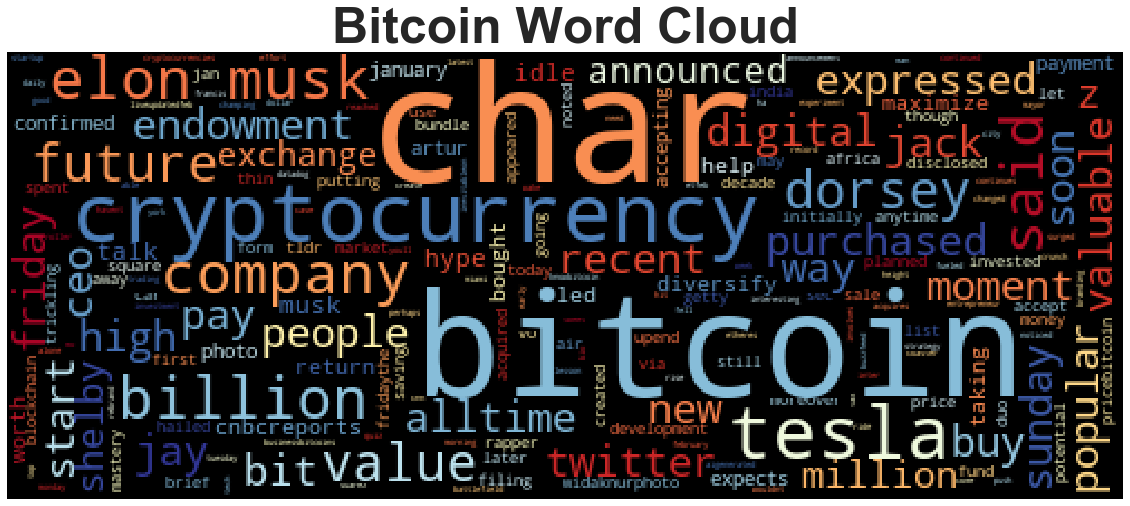

In [67]:
# Generate the Bitcoin word cloud

btc_wc = WordCloud(height= 200, width = 500, colormap="RdYlBu").generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.axis("off")
plt.imshow(btc_wc)

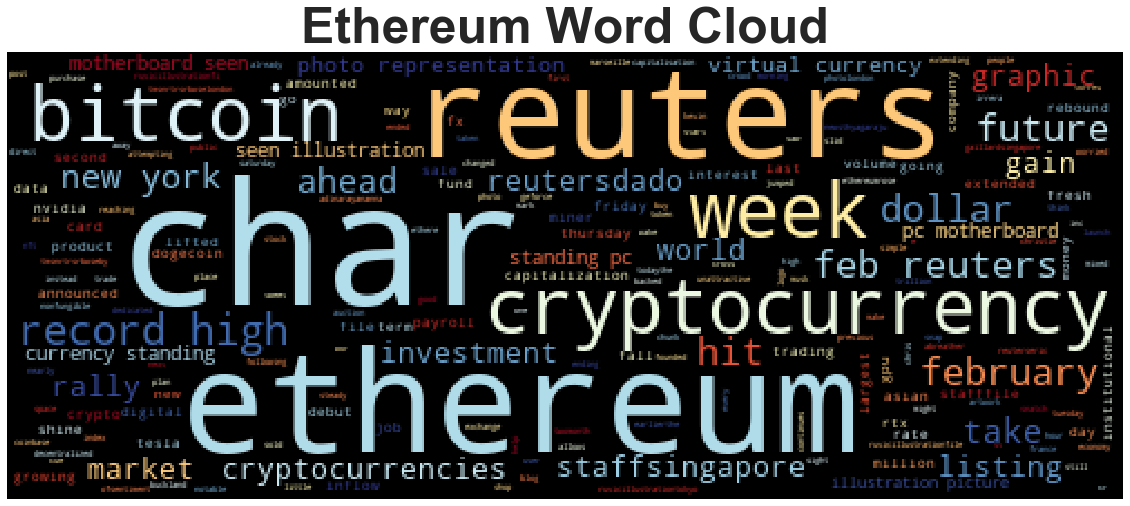

In [65]:
# Generate the Ethereum word cloud
eth_wc = WordCloud(height= 200, width = 500, colormap="RdYlBu").generate(' '.join(eth_tokens))
plt.title("Ethereum Word Cloud", fontsize = 50, fontweight = 'bold')
plt.axis("off")
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [68]:
import spacy
from spacy import displacy

In [69]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [75]:
# Concatenate all of the bitcoin text together
btc_text = ' '.join(bitcoin_sentiment_df.text.to_list())
btc_text

'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars] Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the compan

In [90]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

# Render the NER visualization
displacy.render(btc_doc, style='ent')

In [100]:
# List all Entities
for ent in btc_doc.ents:
    print([ent.text, ent.label_])

['Elon Musks', 'ORG']
['Tesla', 'ORDINAL']
['$1.5 billion', 'MONEY']
['Bitcoin', 'GPE']
['Tesla', 'ORDINAL']
['Elon Musk', 'PERSON']
['about $ 1.5 billion', 'MONEY']
['bitcoin', 'GPE']
['January', 'DATE']
['Artur Widak', 'PERSON']
['Getty', 'PERSON']
['Sunday', 'DATE']
['Tesla', 'ORDINAL']
['$1.5 billion', 'MONEY']
['bitcoin', 'GPE']
['Twitter', 'PERSON']
['Square', 'PERSON']
['Jack Dorsey', 'PERSON']
['Jay Z', 'PERSON']
['Africa', 'LOC']
['India', 'GPE']
['Dorsey', 'GPE']
['Friday', 'DATE']
['500', 'CARDINAL']
['Today', 'DATE']
['SEC', 'ORG']
['Tesla', 'ORDINAL']
['$1.5 billion', 'MONEY']
['bitcoin', 'GPE']
['Bitcoin', 'GPE']
['first', 'ORDINAL']
['more than a decade later', 'DATE']
['Bitcoin', 'GPE']
['21.11', 'MONEY']
['Jan. 28', 'DATE']
['70%', 'PERCENT']
['Bitcoin', 'GPE']
['Feb. 9, 2021', 'DATE']
['8:01 a.m.', 'TIME']
['ET', 'PERSON']
['Feb. 9, 2021', 'DATE']
['8:01 a.m.', 'TIME']
['ET', 'PERSON']
['Bitcoin', 'GPE']
['Teslas', 'GPE']
['Monday', 'DATE']
['1.5', 'MONEY']
['Bitcoin'

---

## Ethereum NER

In [101]:
# Concatenate all of the ethereum text together
eth_text = ' '.join(eth_sentiment_df.text.to_list())
eth_text

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars] By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars] While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most not

In [103]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

# Render the NER visualization
displacy.render(eth_doc, style='ent')

In [104]:
# List all Entities
for ent in eth_doc.ents:
    print([ent.text, ent.label_])

['today', 'DATE']
['2012', 'DATE']
['February 3, 2018', 'DATE']
['REUTERS/Dado Ruvic/Illustration', 'ORG']
['Reuters', 'ORG']
['Reuters', 'ORG']
['February 3, 2018', 'DATE']
['REUTERS/', 'ORG']
['first', 'ORDINAL']
["Christie's", 'ORG']
['NFT', 'ORG']
['a few days', 'DATE']
['one', 'CARDINAL']
['Chris Torres', 'PERSON']
['3060', 'CARDINAL']
['GPU', 'ORG']
['next week', 'DATE']
['Nvidia', 'ORG']
['this morning', 'TIME']
['Reuters', 'ORG']
['SINGAPORE', 'ORG']
['Feb 9', 'DATE']
['Reuters', 'ORG']
['Asia', 'LOC']
['Tuesday', 'DATE']
['bitcoin', 'GPE']
['Tesla Inc', 'ORG']
['bitcoin', 'GPE']
['Reuters', 'ORG']
['Bitcoin', 'GPE']
['Marseille', 'GPE']
['France', 'GPE']
['February 7, 2021', 'DATE']
['REUTERS', 'ORG']
['Eric Gaillard', 'PERSON']
['SINGAPORE', 'PERSON']
['Reuters', 'ORG']
['Reuters', 'ORG']
['second', 'ORDINAL']
['Thursday', 'DATE']
['NEW YORK', 'GPE']
['Feb 18', 'DATE']
['Reuters', 'ORG']
['second', 'ORDINAL']
['Thursday', 'DATE']
['February 3, 2018', 'DATE']
['REUTERS/', 'ORG